In [1]:
import tensorflow as tf
from flows import NormalRW, DFlow, ResFlow, NVPFlow, phase, Normal
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

np.random.seed(1234)

In [2]:
n = 18
s1 = 0.02
m1 = 0.
s0 = 0.1
dim = [3,4]

params = []
params.append(np.random.normal(size=dim, scale=0.1))
for i in range(n-1):
    new = params[i] + np.random.normal(loc=m1, scale=s1, size=dim)
    params.append(new)
params = np.array(params)

PWalk = NormalRW(dim[0]*dim[1], sigma=s1, mu=m1, sigma0=s0)

In [3]:
params.shape

(18, 3, 4)

In [4]:
def autoregr(X, param):
    d = param[:,:3]
    X = np.matmul(d, X) + param[:,-1] + np.random.normal(size=[3], scale=0.2)
    return X

def autoregr_tf(X, param):
    d = param[:,:3]
    X = tf.matmul(d, X) + param[:,-1]
    return X

In [5]:
xs = [np.random.normal(size=dim[0])]
for i in range(n-1):
    xs.append(autoregr(xs[i], params[i]))
xs = np.array(xs)[np.newaxis,:].astype('float32')

In [6]:
xs

array([[[ 0.7491846 , -0.6755215 ,  0.4402664 ],
        [ 0.2853786 , -0.19505195,  0.6874076 ],
        [ 0.19492052,  0.12413283,  0.28284383],
        [-0.44375476, -0.13470252,  0.10563724],
        [ 0.20460293, -0.05354053,  0.16769616],
        [ 0.0736521 , -0.17259689,  0.03410647],
        [-0.25943694, -0.11538336,  0.30966425],
        [ 0.58467716, -0.01450507,  0.3555291 ],
        [ 0.08391836, -0.04719534,  0.40157133],
        [-0.13109328, -0.37927285,  0.44972688],
        [ 0.33514145, -0.03589571,  0.15534624],
        [ 0.10415696,  0.1920269 , -0.13491158],
        [-0.3703929 , -0.12109716,  0.06033021],
        [-0.30903697, -0.25460067,  0.2537161 ],
        [-0.06850147, -0.27348188,  0.54444045],
        [ 0.13846715, -0.05022376,  0.50184196],
        [ 0.14162818,  0.07814812,  0.3355754 ],
        [ 0.399762  , -0.25416684,  0.2542867 ]]], dtype=float32)

In [7]:
output_flow = DFlow([ResFlow(dim=n*dim[0]*dim[1], name='res{}'.format(i)) for i in range(16)])

In [8]:
output_flow.output

<tf.Tensor 'res15/truediv_1:0' shape=(1, 216) dtype=float32>

In [9]:
outputs = tf.reshape(output_flow.output, [1,n,dim[0]*dim[1]])

In [10]:
outputs

<tf.Tensor 'Reshape:0' shape=(1, 18, 12) dtype=float32>

In [11]:
prior = PWalk.logdens(outputs, mean=True)

In [12]:
#outputs = tf.cast(outputs, tf.float64)

In [14]:
prior

<tf.Tensor 'add_32:0' shape=() dtype=float32>

In [15]:
def create_loglik():
    obs_d = Normal(dim=None, sigma=0.2, mu=0)
    out = tf.reshape(outputs, [n, 3, 4])
    
    ll = 0
    for i in range(n-1):
        pred = xs[0,i+1] - autoregr_tf(xs[0,i][:,np.newaxis], out[i])
        ll += obs_d.logdens(pred, full_reduce=True, mean=True)
    return ll

In [16]:
logl = create_loglik()

In [17]:
xs.shape

(1, 18, 3)

In [18]:
logl

<tf.Tensor 'add_66:0' shape=() dtype=float32>

In [19]:
ent = output_flow.logdens/(n*dim[0]*dim[1])

In [20]:
ent

<tf.Tensor 'truediv_20:0' shape=(1,) dtype=float32>

In [21]:
loss = -logl/(n*dim[0]*dim[1]) + (ent - prior)/(xs.shape[1]*xs.shape[2])

In [22]:
opt = tf.train.AdamOptimizer(0.0001).minimize(loss)

In [23]:
sess = tf.InteractiveSession()

In [24]:
tf.global_variables_initializer().run()

In [25]:
for _ in range(1000):
    for _ in range(1):
        l, _ = sess.run([loss, opt], {phase:True})
    print(l)

[8.254474e+31]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[

KeyboardInterrupt: 

In [24]:
out = tf.reshape(outputs, [n, 3, 4])

In [56]:
samples = []
for _ in range(1000):
    s = out.eval()
    samples.append([s[3,1,1], s[0,1,1]])
samples = np.array(samples)

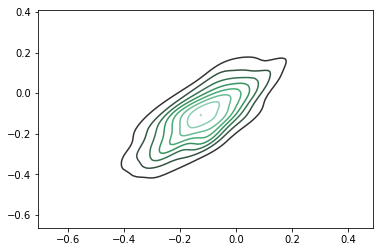

In [57]:
sns.kdeplot(samples[:,0], samples[:,1])
plt.show()